# key words
- datasets: make_blobs
- model selection: train_test_split
- cluster: KMeans
- metrics: accuracy_score, roc_curve, auc

# silhouette distance
Silhouette distance is the ratio of the difference between the in-cluster dissimilarity and the closest out-of-cluster
dissimilarity, and the maximum of these two values. It can be thought of as a measure of how separate the clusters are.

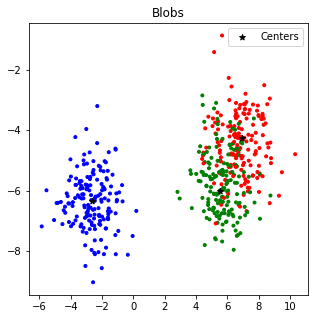

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix, roc_curve, auc

X_blobs3, y_blobs3 = make_blobs(500, centers=3)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs3)
centers = kmeans.cluster_centers_

plt.figure(figsize=(5, 5))
plt.subplot(111, title="Blobs")
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X_blobs3[:, 0], X_blobs3[:, 1], color=rgb[y_blobs3], marker='.')
plt.scatter(centers[:, 0], centers[:, 1], color='k', marker='*', label='Centers')
plt.legend(loc='best')

(array([ 6.,  6., 10., 15., 15., 11., 22., 20., 18., 28., 33., 37., 67.,
        32., 18.,  7., 11., 15., 47., 82.]),
 array([-0.04594063, -0.00099251,  0.0439556 ,  0.08890372,  0.13385183,
         0.17879995,  0.22374806,  0.26869618,  0.31364429,  0.35859241,
         0.40354052,  0.44848864,  0.49343675,  0.53838487,  0.58333298,
         0.6282811 ,  0.67322921,  0.71817733,  0.76312544,  0.80807356,
         0.85302167]),
 <a list of 20 Patch objects>)

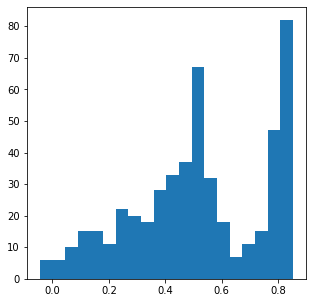

In [8]:
silhouette_distances = silhouette_samples(X_blobs3, kmeans.labels_)
score = silhouette_score(X_blobs3, kmeans.labels_)

plt.figure(figsize=(5, 5))
plt.hist(silhouette_distances, bins=20)

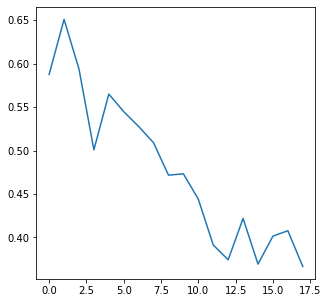

In [13]:
X_blobs10, y_blobs10 = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2, 20):
    kmeans_tmp = KMeans(n_clusters=k)
    kmeans_tmp.fit(X_blobs10)
    silhouette_avgs.append(silhouette_score(X_blobs10, kmeans_tmp.labels_))

plt.figure(figsize=(5, 5))
plt.plot(silhouette_avgs)